This Colab notebook demonstrates how to set up and run federated fine-tuning of Large Language Models (LLMs) using the Flower framework with a pretrained LLama2 model on the Alpaca-GPT4 dataset. We will follow the steps provided in the Flower repository for the LLM FlowerTune example.



Federated LLM Fine-tuning with Flower - LLM FlowerTune

**Overview of Federated LLM Fine-tuning with Flower**
- Large Language Models (LLMs) have revolutionized various domains by leveraging vast amounts of publicly accessible data.
- A challenge arises from the potential depletion of high-quality public data. Federated learning offers a solution by utilizing private data distributed across multiple data owners, without the need to share raw data.

**Introducing LLM FlowerTune**
- This example showcases federated instruction tuning with pretrained LLama2 models using the Alpaca-GPT4 dataset.
- Flower's approach combines several techniques:
  1. **Data Handling**: Uses Flower Datasets to download, partition, and preprocess the dataset.
  2. **Fine-Tuning**: Employs the 🤗PEFT library for fine-tuning the LLMs.  3. **Simulation**: Utilizes Flower's Simulation Engine to conduct the LLM fine-tuning process federatively on a single GPU.

**Environment Setup and Execution**
- **Initial Setup**: Clone the repository and navigate to the `llm-flowertune` directory.
  ```
  git clone --depth=1 https://github.com/adap/flower.git && mv flower/examples/llm-flowertune . && rm -rf flower && cd llm-flowertune
  ```
- **Dependencies**: Install necessary dependencies using:
  ```
  pip install -r requirements.txt
  ```
- **Running the Simulation**:
  - Default run:
    ```
    python main.py
    ```
  - Adjusting parameters for different model configurations and federated settings:
    ```
    python main.py model.name="openlm-research/open_llama_3b_v2" model.quantization=8
    ```

**Expected Results and Resource Management**
- Comparative results highlight better performance and efficiency in different model settings (7B vs. 3B, 8-bit vs. 4-bit).
- VRAM consumption varies by model, demonstrating the feasibility of training with limited resources:
  - Example: Assigning 50% of a GPU's VRAM to each client for concurrent training.
    ```
    python main.py model.name="openlm-research/open_llama_3b_v2" model.quantization=4 client_resources.num_gpus=0.5
    ```

**Testing and Practical Application**
- Post-training, a testing script is provided to evaluate the model on specific questions, reflecting the practical utility and customization capability of federated LLMs:
  ```
  python test.py --peft-path=/path/to/trained-model-dir/ --question="What is the ideal 1-day plan in London?"
  ```

**Future Directions with Flower Next**
- Steps for running federated LLM fine-tuning in a controlled 2-client setting using Flower Next, illustrating advanced deployment scenarios.

###  Conclusion:
LLM FlowerTune exemplifies the potential of federated learning in enhancing the privacy and customization of LLMs, ensuring sustainable AI development by accessing privately held data across distributed environments.

---

Expected Results
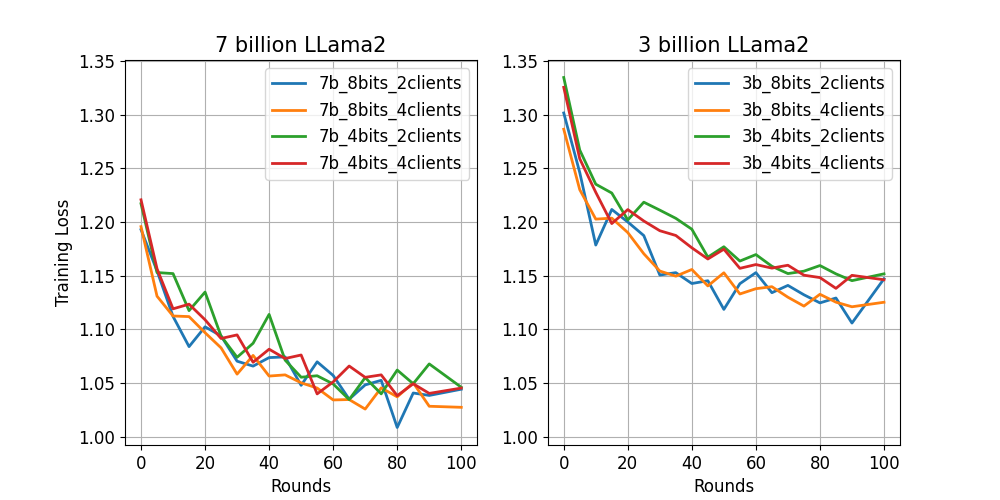

As expected, LLama2-7B model works better than its 3B version with lower training loss. With the hyperparameters tested, the 8-bit model seems to deliver lower training loss for the smaller 3B model compared to its 4-bit version.

In [ ]:
# Federated LLM Fine-tuning with Flower - LLM FlowerTune

# Cell 1: Clone the repository and set up the necessary directory
!git clone --depth=1 https://github.com/adap/flower.git
!mv flower/examples/llm-flowertune . && rm -rf flower
%cd llm-flowertune



In [ ]:



# Cell 2: Install dependencies
!pip install -r requirements.txt




## Running the Federated LLM Fine-Tuning
We will execute the main script to start the federated learning simulation. The default configuration involves a 4-bit OpenLLaMA 7Bv2 model with 2 clients per round for 100 FL rounds. You can modify these settings directly in the command line.

In [ ]:

# Cell 3: Run the federated learning simulation with default settings
!python main.py


### Customize Model and Training Parameters
You may want to test different configurations, such as changing the model size or the quantization bits. Here's how to customize the parameters.


In [ ]:


# Cell 4: Example of running with a different model and configuration
!python main.py model.name="openlm-research/open_llama_3b_v2" model.quantization=8 num_rounds=50 fraction_fit.fraction_fit=0.25


## VRAM Consumption and Resource Management
The VRAM consumption varies depending on the model and settings. Adjusting the VRAM allocation allows you to manage how much GPU resources each client uses. Here's an example of how to allocate 50% of your GPU's VRAM to each client.


In [ ]:


# Cell 5: Assign 50% of the GPU's VRAM to each client
!python main.py model.name="openlm-research/open_llama_3b_v2" model.quantization=4 client_resources.num_gpus=0.5



## Testing the Model
After training, use the following script to test your trained model by passing your questions. This helps verify the practical utility of the federated fine-tuned model.


In [ ]:

# Cell 6: Test the trained model with a custom question
!python test.py --peft-path=/path/to/trained-model-dir/ --question="What is the ideal 1-day plan in London?"



# Conclusion
This notebook has walked you through setting up and running a federated LLM fine-tuning scenario using Flower. You can further experiment with different configurations and models to explore the capabilities of federated learning in privacy-preserving AI development.